In [30]:
# Using Linear and Lasso Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#Data collection
car_dataset=pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#check categorical distribution
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
#encoding data from tect to numerical values
car_dataset.replace({'Fuel_Type':{'Petrol': 0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer': 0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual': 0,'Automatic':1}},inplace=True)

In [14]:
car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [17]:
#Splitting the data into training and test data
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [22]:
print(X.shape,X_test.shape,X_train.shape)

(301, 7) (31, 7) (270, 7)


In [23]:
#Mpdel train
#1.Linear Regression
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
#evaluation of model
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)
#r squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8799451660493711


<function matplotlib.pyplot.show(close=None, block=None)>

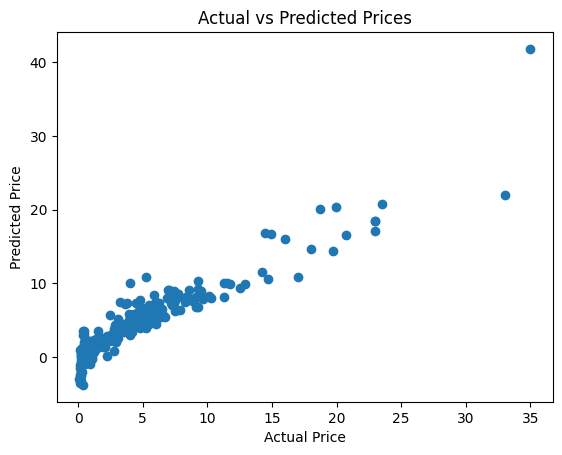

In [31]:
#Visualize the actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show

In [33]:
test_data_prediction=lin_reg_model.predict(X_test)
#r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8365766715027051


<function matplotlib.pyplot.show(close=None, block=None)>

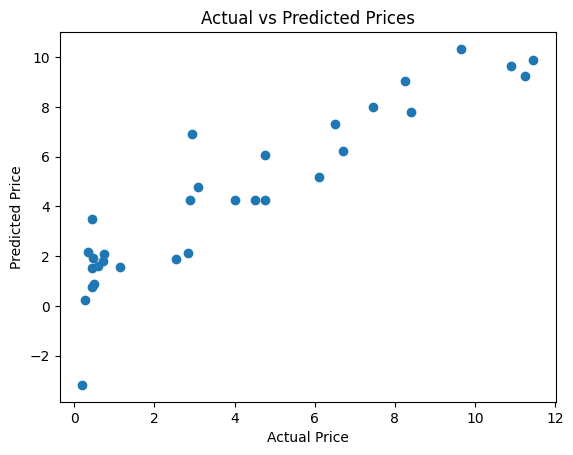

In [34]:
#Visualize the actual and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show

In [35]:
#Mpdel train
#2. Lasso Regression
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [36]:
#evaluation of model
#prediction on training data
training_data_prediction=las_reg_model.predict(X_train)
#r squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8427856123435794


<function matplotlib.pyplot.show(close=None, block=None)>

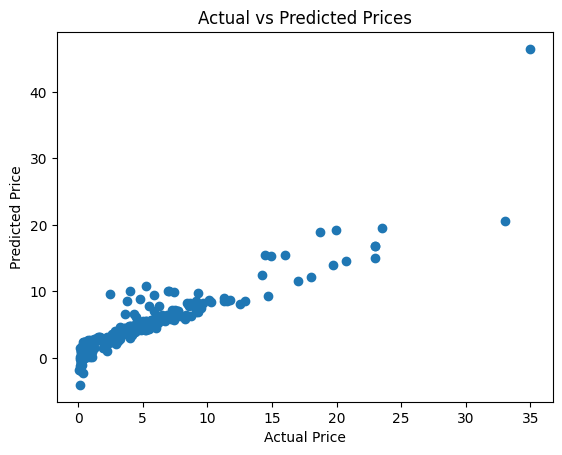

In [37]:
#Visualize the actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show

In [38]:
test_data_prediction=las_reg_model.predict(X_test)
#r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

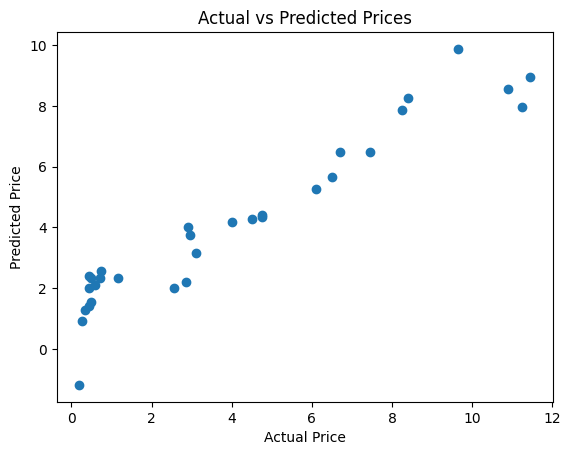

In [39]:
#Visualize the actual and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show